[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Darshinee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Darshinee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      4467
           1       0.88      0.84      0.86      4136

    accuracy                           0.87      8603
   macro avg       0.87      0.87      0.87      8603
weighted avg       0.87      0.87      0.87      8603

Confusion Matrix:


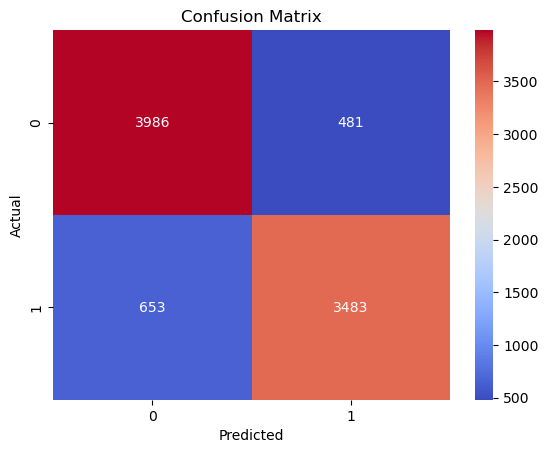

In [5]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

# Step 2: Load CSV and manually assign headers if needed
df = pd.read_csv("D:\\twitter_training.csv", header=None)
df.columns = ['id', 'game', 'label', 'text']

# Step 3: Drop rows with missing text or label
df.dropna(subset=['text', 'label'], inplace=True)

# Step 4: Convert labels to binary
label_map = {'Positive': 1, 'Negative': 0}
df['label'] = df['label'].map(label_map)

# Drop rows where mapping failed (i.e., still NaN)
df = df.dropna(subset=['label'])

# Step 5: Clean text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"[^a-zA-Z\s]", '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

# Step 6: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['label'].astype(int)  # Ensure it's integer type

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 9: Predictions & Evaluation
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
